In [1]:
# pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from scipy import stats
from math import sqrt
import numpy as np
style.use("ggplot")

In [34]:
tickers = ["SPY", "AGG"]
rfr = 1.0138
for ticker in tickers:
    start = dt.datetime(2008, 11, 1)
    end = dt.datetime(2018, 11, 10)
    df = web.DataReader(ticker, "yahoo", start, end)
    df.reset_index(inplace=True)
    df.set_index("Date", inplace=True)
    df.to_csv(ticker + ".csv")

SPY


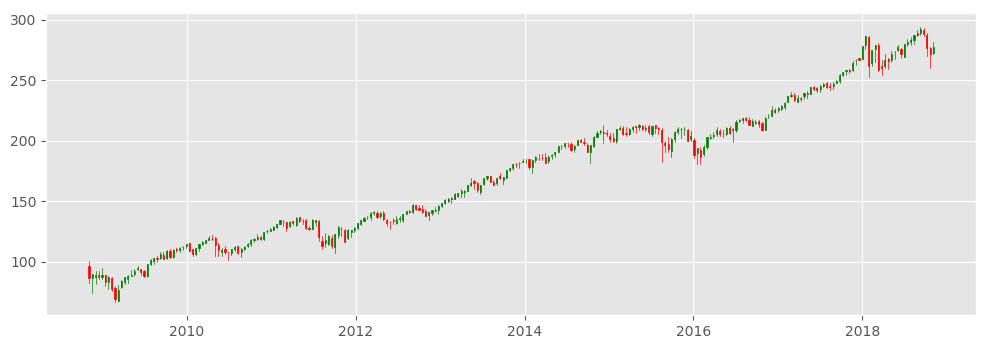

In [35]:
df1 = pd.read_csv(tickers[0] + ".csv", parse_dates=True, index_col=0)
df_ohlc = df1.resample('10B').agg({ 'Open': 'first', 
                        'High': 'max', 
                        'Low': 'min', 
                        'Close': 'last' })

df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

fig = plt.figure(figsize=(12, 4), dpi=100)
ax1 = fig.add_subplot(111)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup="g")

print(tickers[0])
plt.show()

AGG


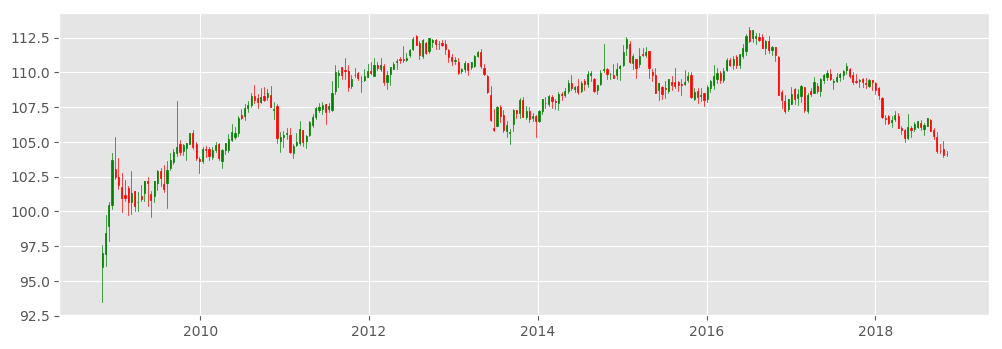

In [36]:
df1 = pd.read_csv(tickers[1] + ".csv", parse_dates=True, index_col=0)
df_ohlc = df1.resample('10B').agg({ 'Open': 'first', 
                        'High': 'max', 
                        'Low': 'min', 
                        'Close': 'last' })

df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

fig = plt.figure(figsize=(12, 4), dpi=100)
ax1 = fig.add_subplot(111)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup="g")

print(tickers[1])
plt.show()

In [37]:
df_eq = pd.read_csv(tickers[0] + ".csv", parse_dates = True, index_col = 0)
df_de = pd.read_csv(tickers[1] + ".csv", parse_dates = True, index_col = 0)

df_eq = df_eq["Adj Close"]
df_de = df_de["Adj Close"]

In [38]:
df_eq = df_eq.resample("261B").last().pct_change()
df_de = df_de.resample("261B").last().pct_change();
df_eq = df_eq.iloc[1:]
df_de = df_de.iloc[1:]

In [39]:
print(df_eq, df_de)

Date
2009-11-03    0.167853
2010-11-03    0.058467
2011-11-03    0.176614
2012-11-02    0.260699
2013-11-04    0.167322
2014-11-04    0.066870
2015-11-04    0.015431
2016-11-03    0.252990
2017-11-03    0.074785
2018-11-05    0.021590
Name: Adj Close, dtype: float64 Date
2009-11-03    0.076341
2010-11-03    0.053659
2011-11-03    0.041510
2012-11-02   -0.012655
2013-11-04    0.041717
2014-11-04    0.015128
2015-11-04    0.044982
2016-11-03    0.008594
2017-11-03   -0.024576
2018-11-05    0.001057
Name: Adj Close, dtype: float64


In [40]:
expected_return_eq = 1
count = 0
for i in df_eq + 1:
    count += 1
    expected_return_eq *= i
expected_return_eq = expected_return_eq**(1/count)
expected_return_de = 1
count = 0
for i in df_de + 1:
    count += 1
    expected_return_de *= i
expected_return_de = expected_return_de**(1/count)
print(expected_return_eq)
print(expected_return_de)

1.1230030132189792
1.0241251338834805


In [41]:
std_eq = df_eq.std()
std_de = df_de.std()
print(std_eq)
print(std_de)

0.0907364911642054
0.032010866832472444


In [42]:
print(df_eq, df_de)

Date
2009-11-03    0.167853
2010-11-03    0.058467
2011-11-03    0.176614
2012-11-02    0.260699
2013-11-04    0.167322
2014-11-04    0.066870
2015-11-04    0.015431
2016-11-03    0.252990
2017-11-03    0.074785
2018-11-05    0.021590
Name: Adj Close, dtype: float64 Date
2009-11-03    0.076341
2010-11-03    0.053659
2011-11-03    0.041510
2012-11-02   -0.012655
2013-11-04    0.041717
2014-11-04    0.015128
2015-11-04    0.044982
2016-11-03    0.008594
2017-11-03   -0.024576
2018-11-05    0.001057
Name: Adj Close, dtype: float64


In [43]:
list1 = list()
for element in df_eq:
    list1.append(element)
print(list1)
list2 = list()
for element in df_de:
    list2.append(element)
print(list2)

[0.16785253549475843, 0.05846682154476457, 0.17661417921871836, 0.2606994426429301, 0.16732225311010618, 0.0668697745120792, 0.015430554438408128, 0.25299047422410514, 0.0747852554047217, 0.02158956291270453]
[0.07634067428873692, 0.05365857784321615, 0.04150996858411182, -0.012655236690762961, 0.041716527127121594, 0.015128318628507609, 0.04498239877411625, 0.008594447749055156, -0.024576249892416135, 0.0010573457586513513]


In [44]:
cov = np.cov(list2, list1)[0][1]
print(cov)

-0.00022238562105820274


In [45]:
expected_return_de = (expected_return_de - 1) * 100
expected_return_eq = (expected_return_eq - 1) * 100
rfr = (rfr - 1) * 100

In [46]:
print("Exp return för equity är", expected_return_eq)
print("Exp return för debt är", expected_return_de)
print("Risk free rate är", rfr)
print("Standardavvikelsen för equity är", std_eq)
print("Standardavvikelsen för debt är", std_de)
print("Deras covarians är", cov)

Exp return för equity är 12.300301321897923
Exp return för debt är 2.4125133883480476
Risk free rate är 1.3800000000000034
Standardavvikelsen för equity är 0.0907364911642054
Standardavvikelsen för debt är 0.032010866832472444
Deras covarians är -0.00022238562105820274


In [47]:
weight_debt = (expected_return_de - rfr) * std_eq * std_eq - (expected_return_eq - rfr) * cov 
weight_debt /= (expected_return_de - rfr) * std_eq * std_eq + (expected_return_eq - rfr) * std_de * std_de - ((expected_return_de - rfr) + (expected_return_eq - rfr))*cov
weight_equity = 1 - weight_debt
print("Weight debt:", weight_debt)

Weight debt: 0.48903110900693175


In [48]:
exp_return_de = (expected_return_de) / 100
exp_return_eq = (expected_return_eq) / 100
print(exp_return_de, exp_return_eq)
er = weight_equity * (exp_return_eq) + weight_debt * (exp_return_de) - rfr / 100
std = sqrt(weight_equity * weight_equity * std_eq * std_eq + weight_debt * weight_debt * std_de * std_de + 2 * weight_equity * weight_debt * cov)
sr = er / std

0.024125133883480476 0.12300301321897923


In [49]:
A = 20 # Risk aversion

In [50]:
weight_risky_portfoilio = er / (A * std * std)
weight_risk_free = 1 - weight_risky_portfoilio
print("Weight risky portfoilio",weight_risky_portfoilio)
print("Weight risk free asset", weight_risk_free)

Weight risky portfoilio 1.3323582409161918
Weight risk free asset -0.3323582409161918


In [51]:
results = np.zeros((3, 101))
best_sr = 0
best_de_weight = 0

for weight in range(101):
    weight_eq = weight / 100
    weight_de = 1 - weight_eq
    er = weight_eq * (exp_return_eq) + weight_de * (exp_return_de) - rfr / 100
    std = sqrt(weight_eq * weight_eq * std_eq * std_eq + weight_de * weight_de * std_de * std_de + 2 * weight_eq * weight_de * cov)
    sr = er / std
    if sr > best_sr:
        best_sr = sr
        best_de_weight = weight_de
    print(weight_de, sr)
    results[0,weight] = er
    results[1,weight] = std
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,weight] = sr
print("The best debt weight was", best_de_weight)

1.0 0.3225508992779423
0.99 0.3576478470743085
0.98 0.39325731340460235
0.97 0.42929281764506266
0.96 0.46565812217038505
0.95 0.5022478503033384
0.94 0.5389484073122277
0.9299999999999999 0.5756392083054278
0.92 0.6121942013126278
0.91 0.6484836567030298
0.9 0.6843761766378335
0.89 0.7197408620045179
0.88 0.7544495608402956
0.87 0.7883791131151697
0.86 0.8214135030766918
0.85 0.8534458328076541
0.84 0.8843800392236265
0.83 0.9141322907782474
0.8200000000000001 0.9426320183927032
0.81 0.969822555893729
0.8 0.9956613866420782
0.79 1.0201200132186057
0.78 1.043183484437839
0.77 1.0648496274455745
0.76 1.0851280416137992
0.75 1.1040389152787242
0.74 1.1216117264304655
0.73 1.1378838849419552
0.72 1.1528993677002746
0.71 1.166707390017926
0.7 1.1793611478485333
0.69 1.1909166563792546
0.6799999999999999 1.20143170211955
0.6699999999999999 1.210964918069246
0.6599999999999999 1.2195749851722562
0.65 1.227319958143252
0.64 1.2342567098763566
0.63 1.2404404859108467
0.62 1.2459245586933436
0.

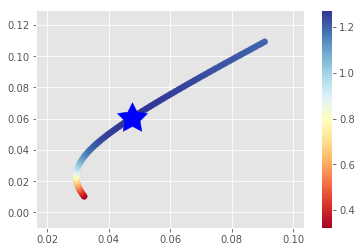

In [52]:

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
#plot blue star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='b',s=1000)